# STEP 1 — Clone the github ripo

In [225]:

!git clone https://github.com/Rifat210133/CNN.git

%cd CNN


Cloning into 'CNN'...
remote: Enumerating objects: 30045, done.
remote: Counting objects: 100% (30045/30045), done.
remote: Compressing objects: 100% (25424/25424), done.
remote: Total 30045 (delta 4627), reused 30007 (delta 4620), pack-reused 0 (from 0)
Receiving objects: 100% (30045/30045), 21.74 MiB | 14.43 MiB/s, done.
Resolving deltas: 100% (4627/4627), done.
Updating files: 100% (30013/30013), done.
/content/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN/CNN


# STEP 2 — IMPORT LIBRARIES

In [226]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix


# STEP 3 — DATA PREPROCESSING (CRITICAL)

If phone images ≠ training format, predictions become garbage.

This pipeline standardizes all images so the CNN trains faster, more stably, and predicts more accurately.

In [227]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])


# STEP 4 — STANDARD DATASET (AUTO-CREATED)

This code loads the training image dataset from the specified directory using ImageFolder, which automatically assigns labels based on folder names. The defined transform is applied to every image to resize and normalize it before training. A DataLoader is then created to feed the data to the model in shuffled batches of 64 images for efficient training. Finally, the class names are extracted from the folder structure, the total number of classes is calculated, and the detected classes are printed.

In [228]:
train_dir = "geometric_shapes/geometric shapes dataset"

train_dataset = datasets.ImageFolder(
    root=train_dir,
    transform=transform
)

train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)

class_names = train_dataset.classes
num_classes = len(class_names)

print("Classes:", class_names)


Classes: ['Circle', 'Square', 'Triangle']


# STEP 5 — CNN MODEL
This CNN model extracts visual features from RGB images using three convolution–ReLU–max-pooling blocks that progressively learn more complex patterns while reducing spatial size. The extracted feature maps are then flattened and passed through fully connected layers to perform final classification into the specified number of classes

In [229]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# STEP 6 — Model Setup and Training Configuration

This section selects the computation device initializes the CNN model on that device, defines the loss function for multi-class classification, and sets up the Adam optimizer to update model parameters during training.

In [230]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# STEP 7 — TRAINING LOOP
This training loop runs the model for 12 epochs, where in each epoch the network processes batches of images, computes the loss, performs backpropagation, and updates weights using the optimizer. During training, it tracks total loss and classification accuracy for each epoch and prints the progress to monitor how well the model is learning.

In [231]:
epochs = 12
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = 100 * correct / total
    train_losses.append(running_loss)
    train_accuracies.append(acc)

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss:.4f} Acc: {acc:.2f}%")


Epoch [1/12] Loss: 414.7558 Acc: 54.06%
Epoch [2/12] Loss: 150.2877 Acc: 86.74%
Epoch [3/12] Loss: 42.5068 Acc: 96.92%
Epoch [4/12] Loss: 17.6883 Acc: 98.80%
Epoch [5/12] Loss: 8.8319 Acc: 99.49%
Epoch [6/12] Loss: 7.1513 Acc: 99.53%
Epoch [7/12] Loss: 6.6649 Acc: 99.56%
Epoch [8/12] Loss: 4.0078 Acc: 99.79%
Epoch [9/12] Loss: 6.7406 Acc: 99.58%
Epoch [10/12] Loss: 1.7136 Acc: 99.93%
Epoch [11/12] Loss: 4.9901 Acc: 99.69%
Epoch [12/12] Loss: 1.8864 Acc: 99.90%


# STEP 8 — SAVE MODEL

In [232]:
os.makedirs("model", exist_ok=True)
torch.save(model.state_dict(), "model/geometric_cnn.pth")
print("Model saved successfully!")


Model saved successfully!


# STEP 9 — TRAINING VISUALS
This code visualizes the training progress by plotting two graphs side by side: one showing how the loss changes over epochs and the other showing how the accuracy improves, helping to monitor model performance during training.

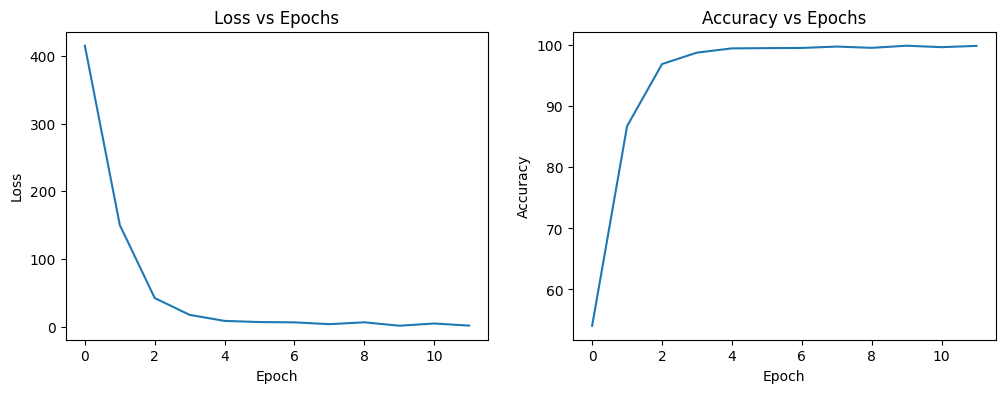

In [233]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(train_accuracies)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


# phone dataset

In [234]:
phone_dir = "custom_dataset_from_phone"
phone_images = os.listdir(phone_dir)


# STEP 10 — real world prediction confidance
This code evaluates the trained CNN on a set of test images from the custom_dataset_from_phone folder. It collects all images from the class subfolders (circle, square, triangle), converts them to tensors, and feeds them through the model to get predictions. For each image, it plots the original image with a title showing the true class and the predicted class with confidence, arranging them in a grid for easy visualization of model performance.

Total images found: 13


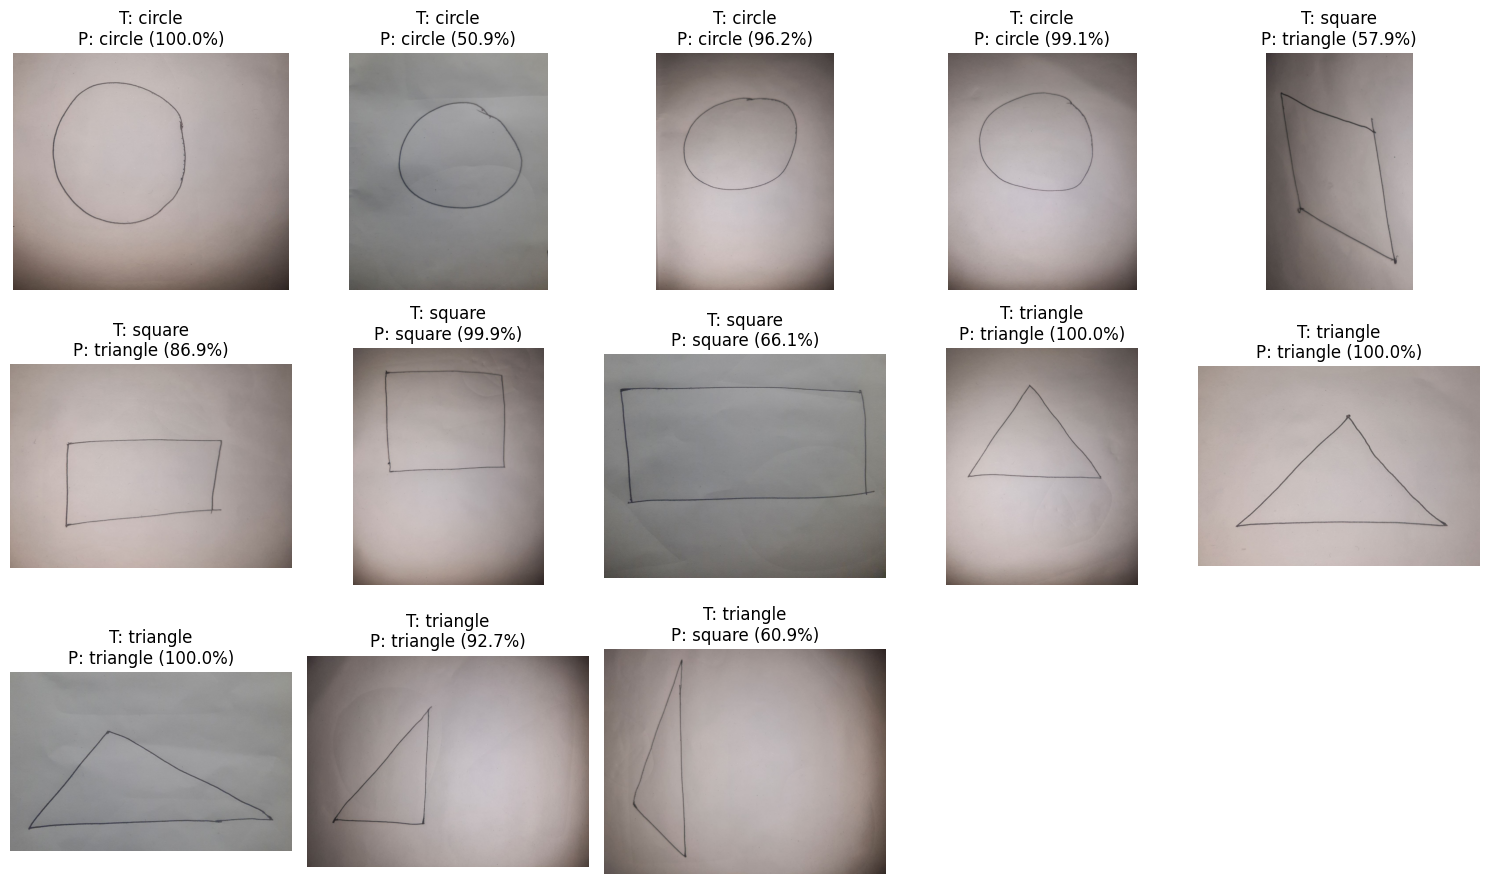

In [235]:
import os
import math
from PIL import Image
import torch
import matplotlib.pyplot as plt

plt.close('all')
model.eval()

class_names = ['circle', 'square', 'triangle']
phone_dir = "custom_dataset_from_phone"

images_to_show = []

for cls in class_names:
    cls_path = os.path.join(phone_dir, cls)

    if not os.path.isdir(cls_path):
        continue

    for img_name in os.listdir(cls_path):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            images_to_show.append(
                (os.path.join(cls_path, img_name), cls)
            )

num_images = len(images_to_show)
print("Total images found:", num_images)

cols = 5
rows = max(1, math.ceil(num_images / cols))

plt.figure(figsize=(cols * 3, rows * 3))

for i, (img_path, true_cls) in enumerate(images_to_show):
    orig_image = Image.open(img_path).convert("RGB")
    img_tensor = transform(orig_image).unsqueeze(0).to(device)

    with torch.no_grad():
        probs = torch.softmax(model(img_tensor), dim=1)
        conf, pred = torch.max(probs, 1)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(orig_image)
    plt.title(
        f"T: {true_cls}\nP: {class_names[pred.item()]} ({conf.item()*100:.1f}%)"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


# STEP 11 — CONFUSION MATRIX
This code evaluates the trained CNN on the real images in custom_dataset_from_phone and measures how well it predicts each class. It loops through all images, converts them to tensors, gets model predictions, and collects the predicted and true labels. Then it computes a confusion matrix, which shows how many images of each true class were classified as each predicted class. Finally, it visualizes this matrix using a heatmap, allowing you to see where the model is performing well or making mistakes.

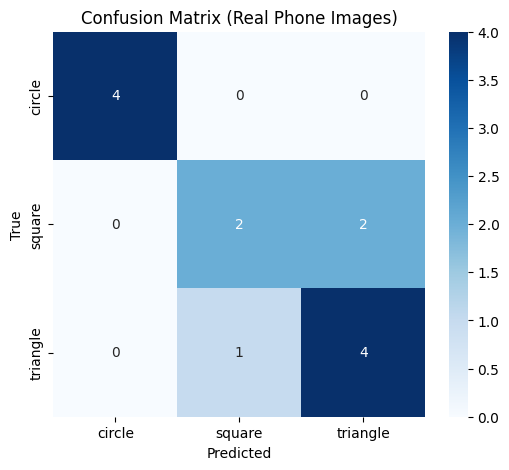

In [236]:
import os
from PIL import Image
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['circle', 'square', 'triangle']
class_to_idx = {cls: i for i, cls in enumerate(class_names)}

phone_dir = "custom_dataset_from_phone"

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():

    for cls in class_names:
        cls_path = os.path.join(phone_dir, cls)
        if not os.path.isdir(cls_path):
            continue


        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)


            if not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            image = Image.open(img_path).convert("RGB")
            img_tensor = transform(image).unsqueeze(0).to(device)

            output = model(img_tensor)
            pred = output.argmax(1).item()

            all_preds.append(pred)
            all_labels.append(class_to_idx[cls])


cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Real Phone Images)")
plt.show()


# STEP 12 — visual error analysis
This code identifies and visualizes misclassified images from the training set. It loops through each batch, gets model predictions, and compares them with the true labels. If a prediction is wrong, it converts the tensor back to a PIL image and stores it along with the predicted and true class indices. Finally, it plots the first three misclassified images side by side, showing both the predicted and actual class for each, helping to quickly inspect where the model is making mistakes.

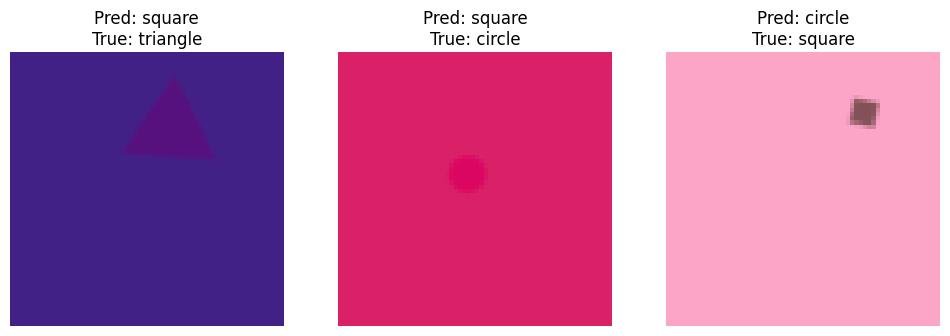

In [237]:
errors = []

for images, labels in train_loader:
    images = images.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    for img_tensor, pred, label in zip(images, preds, labels):
        if pred != label:

            img = img_tensor.cpu() * 0.5 + 0.5
            img = transforms.ToPILImage()(img)
            errors.append((img, pred.item(), label.item()))

if len(errors) >= 3:
    plt.figure(figsize=(12,4))
    for i in range(3):
        img, p, t = errors[i]
        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.title(f"Pred: {class_names[p]}\nTrue: {class_names[t]}")
        plt.axis("off")
    plt.show()
